## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.


---

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [67]:
os.listdir('..')

['amz_uk_price_prediction_dataset.csv',
 'archive.zip',
 'Day1_lab-eda-univariate',
 'Day2']

In [68]:
product_df = pd.read_csv('../amz_uk_price_prediction_dataset.csv')

In [69]:
product_df.shape, product_df.columns

((2443651, 9),
 Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
        'boughtInLastMonth', 'category'],
       dtype='object'))

In [70]:
product_df.loc[:,'category'] = product_df['category'].apply(lambda x: x[:18] if isinstance(x,str) else x)

In [71]:
product_df.category.value_counts()

category
Sports & Outdoors     836265
Beauty                 19312
Handmade Clothing,     19229
Bath & Body            19092
Birthday Gifts         18978
                       ...  
Plugs                    107
Motorbike Chassis        107
Alexa Built-In Dev       107
Smart Home Securit       104
Smart Speakers            54
Name: count, Length: 295, dtype: int64

In [72]:
# Part 1 Q1
categories, cat_norm = product_df.category.value_counts(), product_df.category.value_counts(normalize=True)
pd.concat([categories[:5], cat_norm[:5]], axis=1)

,count,proportion
category,,
Sports & Outdoors,836265,0.342219
Beauty,19312,0.007903
"Handmade Clothing,",19229,0.007869
Bath & Body,19092,0.007813
Birthday Gifts,18978,0.007766


### Top 5 products:
1. Sports & Outdoors : The vast majority of products in this Amazon DB
2. Beauty
3. Handmade Clothes/Shoes/Accessories
4. Bath & Body
5. Birthday Gifts

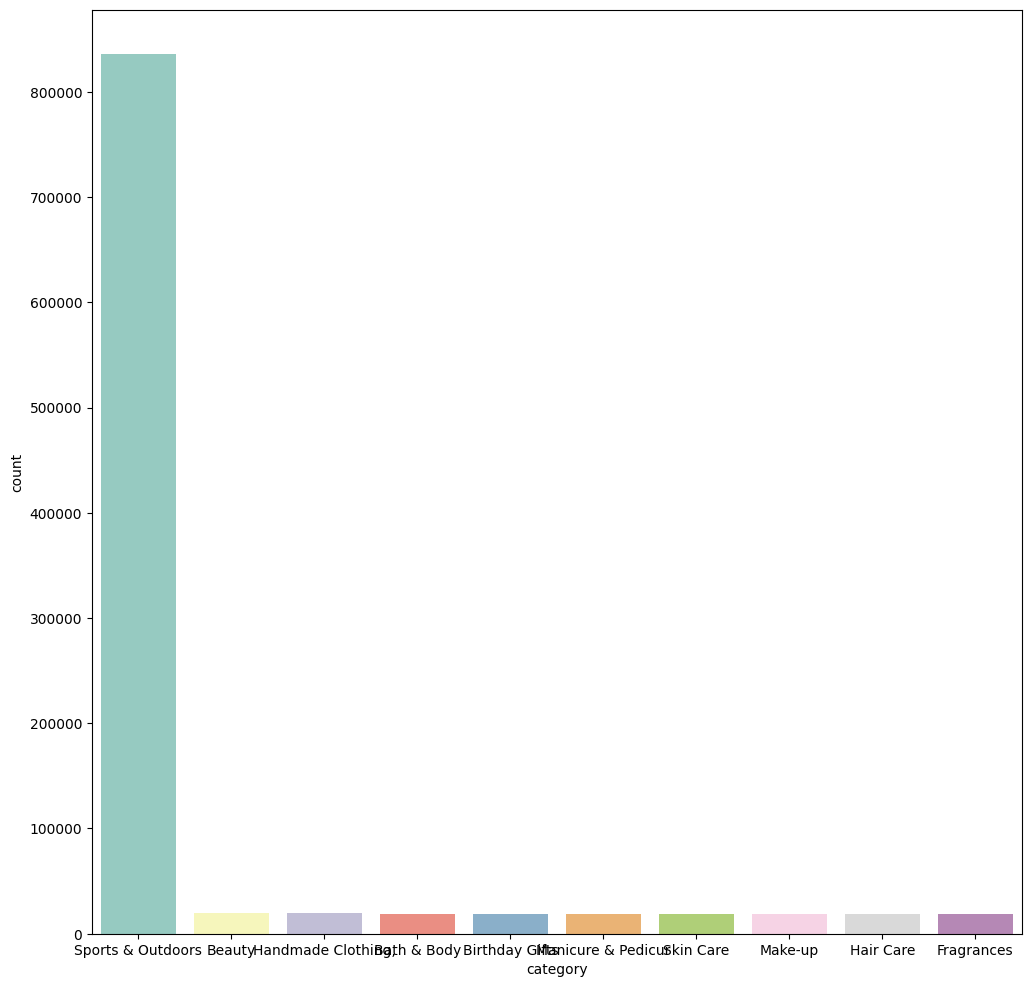

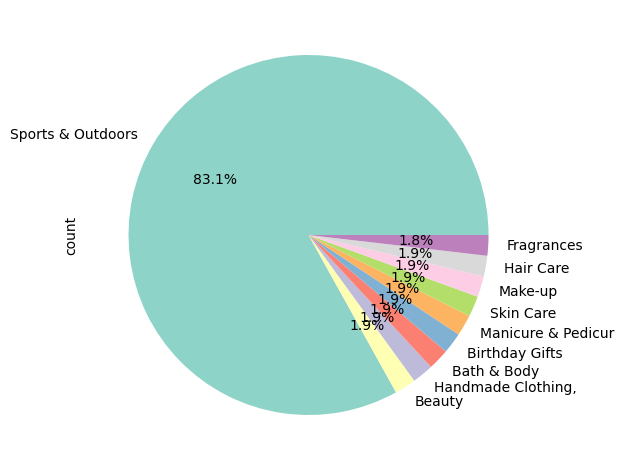

In [73]:
# Part 1 Q2 visualization
top10 = categories[:10].reset_index().set_index('category')
# Bar plot
plt.figure(figsize=(12, 12))
ax = sns.barplot(x=top10.index, y=top10['count'], palette="Set3", hue=top10.index,legend=False)
pie = top10.plot.pie(autopct='%1.1f%%', startangle=0, colors=sns.color_palette("Set3"), subplots=True,legend=False)# pie chart
plt.tight_layout()
plt.show()

### **Insights**:
According to the insights: 
- Products in the sports category massively dominate the listings in the db, taking up 83% of listings
- THe other 9 are evenly distributed

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

---

In [75]:
mean_price = product_df['price'].mean()
median_price = product_df['price'].median()
mode_price = product_df['price'].mode()[0]
print(f"{mean_price=:.2f}, {median_price=}, {mode_price=}")

mean_price=89.24, median_price=19.09, 9.99


### **Part 2 Q1 insights**:
The average price listing is 89.24.

The median is only 19.09; 
This indicates a heavy skew of much higher price listings in the distribution of the data

The mode is 9.99, which indicates that the most common price listings are inexpensive
compared to the average price. 

In [83]:
#variance, standard deviation, range, and interquartile range
variance_price = product_df['price'].var()
std_dev_price = product_df['price'].std()
range_price = product_df['price'].max() - product_df['price'].min()
quantiles_price = product_df['price'].quantile([0.25, 0.5, 0.75])

print(f"{variance_price=:.2f}, {std_dev_price=:.2f}, {range_price=}, IQR: {quantiles_price[0.75] - quantiles_price[0.25]}")
print("quantiles_price:")
quantiles_price

variance_price=119445.49, std_dev_price=345.61, range_price=100000.0, IQR: 36.0
quantiles_price:


0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

### **Part 2 Q2 insights**:
From the data, we see a very large range, variance, and standard deviation, 
which indicates a very broad spread/range of price listings , 
including price listings that are 10k or even 100k.

The interquantile range suggests that the very high listings (>1000) are outside the  
therefore many of them could be considered outliers of the dataset.

<Axes: xlabel='price', ylabel='Count'>

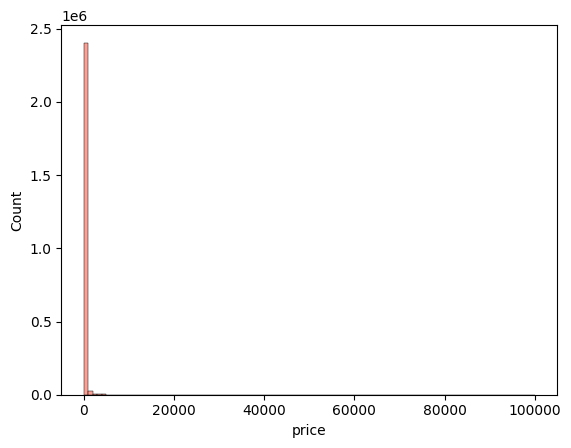

In [92]:
sns.histplot(product_df['price'], bins=100, color="salmon")

<Axes: ylabel='price'>

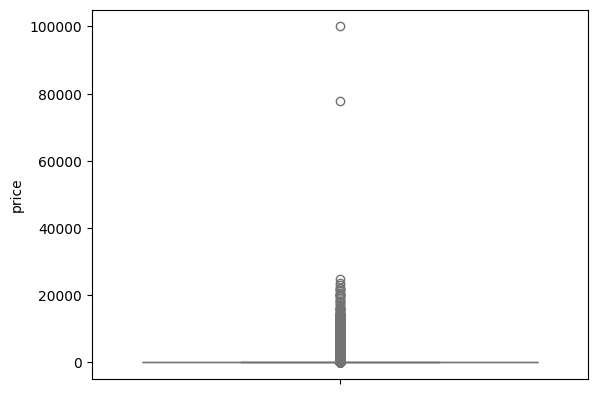

In [93]:
sns.boxplot(data = product_df['price'], color="aquamarine")

### **Part 2 Q3 insights**:
From the histogram, we see that the mass majority of prices lie within 
the inexpensive (\$0-\$100) range, of which there are around 2 million listings, 

but there is a very large tail for the very high product listings towards the thousands(1k-100k), 

indicating a very skewed distribution in the price listings

From the box plot, we see that indeed most of the high listed priced above \\$100 are indeed displayed as outliers 
indicating that these listings are not the norm and that listings above at least \\$1000 should be filtered out
for any useful analysis.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

In [112]:
# 1
mean_rating = product_df['stars'].mean()
median_rating =  product_df['stars'].median()
mode_rating = product_df['stars'].mode()[0]
print(f"{mean_rating=:.2f}, {median_rating=}, {mode_rating=}")

print("-----After filtering zero ratings------")
ratings = product_df[product_df['stars'] > 0.0]['stars']
mean_rating = ratings.mean()
median_rating = ratings.median()
mode_rating =ratings.mode()[0]
print(f"{mean_rating=:.2f}, {median_rating=}, {mode_rating=}")

mean_rating=2.15, median_rating=0.0, mode_rating=0.0
-----After filtering zero ratings------
mean_rating=4.32, median_rating=4.4, mode_rating=4.5


### Part 3 Q1 Insights:
it seems the average rating is only 2.15, but the median and mode are 0,
which indicates the majority of ratings are zero. 

This could indicate either most 
buyers don't rate products and therefore recorded as zero. 

**After filtering out zero ratings**

- The mean is 4.32/5
- The median is 4.4/5, which is close to the avg rating indicating little to no skewed data points
- The mode is 4.5/5, which also indicates little to no skewness compared to the avg rating

In [108]:
#Part 3 Q2
variance_rating = product_df['stars'].var()
std_dev_rating = product_df['stars'].std()
range_rating = product_df['stars'].max() - product_df['stars'].min()
quantiles_rating = product_df['stars'].quantile([0.25, 0.5, 0.75])

print(f"{variance_rating=:.2f}, {std_dev_rating=:.2f}, {range_rating=}, IQR: {quantiles_rating[0.75] - quantiles_rating[0.25]}")
print("quantiles_rating:")
quantiles_rating

variance_rating=4.82, std_dev_rating=2.19, range_rating=5.0, IQR: 4.4
quantiles_rating:


0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64

### Part 3 Q2 insights
According to the data, it seems the majority of ratings are zero, 
with many non-zero ratings between 50% & 75% percentiles.

This seemingly indicates that the majority of customers don't rate their purchases.

In [113]:
#Part 3 Q3
skewness_price = product_df['stars'].skew()
kurtosis_price = product_df['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

### Part 3 Q3 Insights
skew: 0.081
kurtosis: -1.92
1. The skewness is almost zero, indicating almost balanced distribution
2. The kurtosis is less than 3 and negative.

<Axes: xlabel='stars', ylabel='Count'>

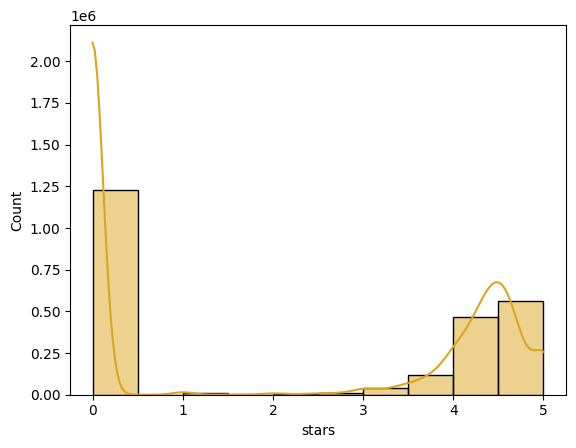

In [121]:
# Part 3 Q4
sns.histplot(product_df['stars'], kde=True, bins=10, color="#daa520")

### Part 3 Q4 insights
The histogram indicates two peaks: around the zero star ratings and around 4.5/5 stars

This indicates two things:
1. zero star ratings are indeed most common(mostly likely representing no rating)
2. filtering out zero stars, the most common rating is between 4 and 5 stars. 